percentage=	 1.4530551415797317


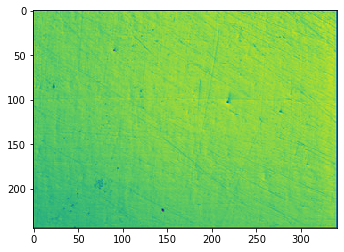

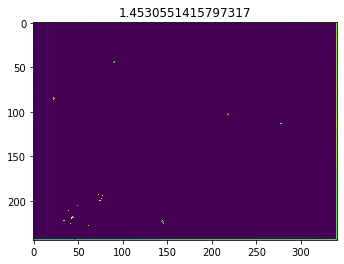

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
'''
Build the porosity percentage code
'''
Iold = cv2.imread('Picture4.jpg')
Iold = cv2.cvtColor(Iold, cv2.COLOR_BGR2GRAY)
#cv.imshow('The_GrayScale',Iold)
#cv2.waitKey(0)
#---------------------------------
image_double = np.double(Iold)
count = 0
for row in np.arange(0,Iold.shape[0]):
    for col in np.arange(0,Iold.shape[1]):
        if image_double[row,col] <= 100:
            count = count+1
            image_double[row,col] == 255
        else:
            image_double[row,col] = 0


#Percentage of pore
percentage = (count/(Iold.shape[0]*Iold.shape[1]))*100
print('percentage=\t',percentage)
# Draw the picture
#fig, axs = plt.subplots(2,2)
#axs[0,0].set_title('Origin_image')
#axs[0,0].imshow(np.double(Iold))
#axs[1,1].set_title(str(percentage))
#axs[1,1].imshow(image_double)
plt.imshow(np.double(Iold))
plt.show()
plt.imshow(image_double)
plt.title(percentage)
plt.show()


In [5]:
# pore location
Iold.astype(np.uint8)
ret, thresh = cv2.threshold(Iold,100,255,0)
x = []
y = []
#find countouts in the binary image
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
number =0
for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    x.append(cX)
    y.append(cY)
    print('cx=\t',cX,'\t','cy=\t',cY)
    number = number+1
print('number=',number)


cx=	 62 	 cy=	 227
cx=	 41 	 cy=	 225
cx=	 145 	 cy=	 223
cx=	 34 	 cy=	 222
cx=	 43 	 cy=	 218
cx=	 39 	 cy=	 210
cx=	 49 	 cy=	 205
cx=	 74 	 cy=	 199
cx=	 76 	 cy=	 197
cx=	 77 	 cy=	 194
cx=	 73 	 cy=	 193
cx=	 75 	 cy=	 192
cx=	 277 	 cy=	 113
cx=	 218 	 cy=	 102
cx=	 22 	 cy=	 84
cx=	 90 	 cy=	 44
cx=	 170 	 cy=	 121
number= 17


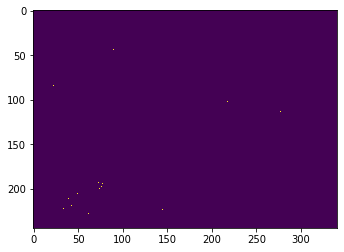

In [6]:
image = Iold
for i in np.arange(0,Iold.shape[0]):
    for j in np.arange(0,Iold.shape[1]):
        image[i,j] = 0
for num in np.arange(0,np.size(x)-1):
    image[y[num],x[num]] = 255
plt.imshow(image)
plt.show()